In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_df = pd.read_csv('concrete_train.csv')
test_df = pd.read_csv('concrete_test.csv')

In [3]:
train_df.head()

,Id,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,995,158.6,148.9,116.0,175.1,15.0,953.3,719.7,28,27.68
1,507,424.0,22.0,132.0,178.0,8.5,822.0,750.0,28,62.05
2,334,275.1,0.0,121.4,159.5,9.9,1053.6,777.5,3,23.80
3,848,252.0,97.0,76.0,194.0,8.0,835.0,821.0,28,33.40
4,294,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,3,7.40


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                824 non-null    int64  
 1   cement            824 non-null    float64
 2   slag              824 non-null    float64
 3   flyash            824 non-null    float64
 4   water             824 non-null    float64
 5   superplasticizer  824 non-null    float64
 6   coarseaggregate   824 non-null    float64
 7   fineaggregate     824 non-null    float64
 8   age               824 non-null    int64  
 9   csMPa             824 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 64.5 KB


In [5]:
train_df.shape

(824, 10)

In [6]:
train_df.describe()

,Id,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000
mean,513.847087,283.360801,74.371602,53.160801,181.797087,6.163956,973.548544,772.107403,44.661408,35.857864
std,296.786779,107.536404,86.977784,64.000646,21.321905,5.967258,78.694630,80.984717,60.475702,16.865099
min,0.000000,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,251.750000,192.000000,0.000000,0.000000,164.900000,0.000000,932.000000,726.775000,12.250000,23.685000
50%,513.500000,275.100000,22.000000,0.000000,185.350000,6.100000,968.000000,778.500000,28.000000,34.080000
75%,770.250000,359.900000,144.775000,118.300000,192.000000,10.125000,1040.600000,821.250000,56.000000,45.862500
max,1028.000000,540.000000,359.400000,195.000000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
train_df.skew()

Id                  0.000627
cement              0.493343
slag                0.802065
flyash              0.566038
water               0.091973
superplasticizer    0.897750
coarseaggregate    -0.041485
fineaggregate      -0.239988
age                 3.335411
csMPa               0.461933
dtype: float64

In [8]:
print('Minimum value in cement column is :', train_df['cement'].min())
print('Maximum value in cement column is :', train_df['cement'].max())

Minimum value in cement column is : 102.0
Maximum value in cement column is : 540.0


In [9]:
print('Minimum age is :', train_df['age'].min())
print('Maximum age is :', train_df['age'].max())

Minimum age is : 1
Maximum age is : 365


In [10]:
print('Minimum value in csMPa column is :', train_df['csMPa'].min())
print('Maximum value in csMPa column is :', train_df['csMPa'].max())

Minimum value in csMPa column is : 2.33
Maximum value in csMPa column is : 82.6


# EDA:

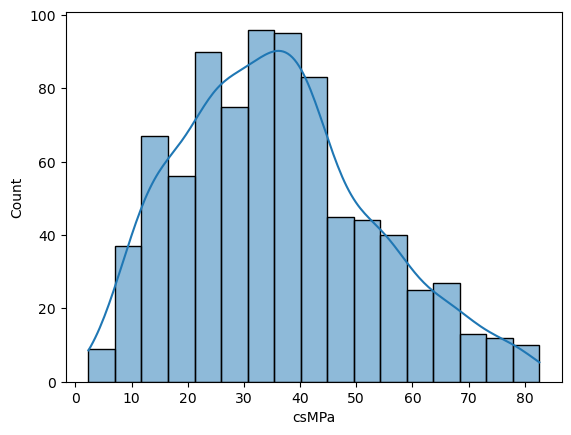

In [11]:
sns.histplot(data = train_df, x= "csMPa", kde = True)
plt.show()

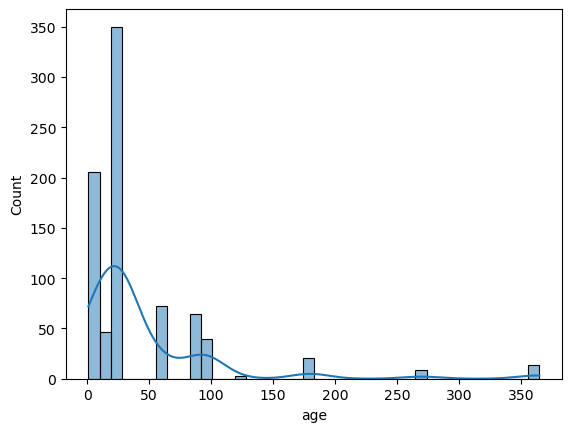

In [12]:
sns.histplot(data = train_df, x = 'age', kde = True)
plt.show()

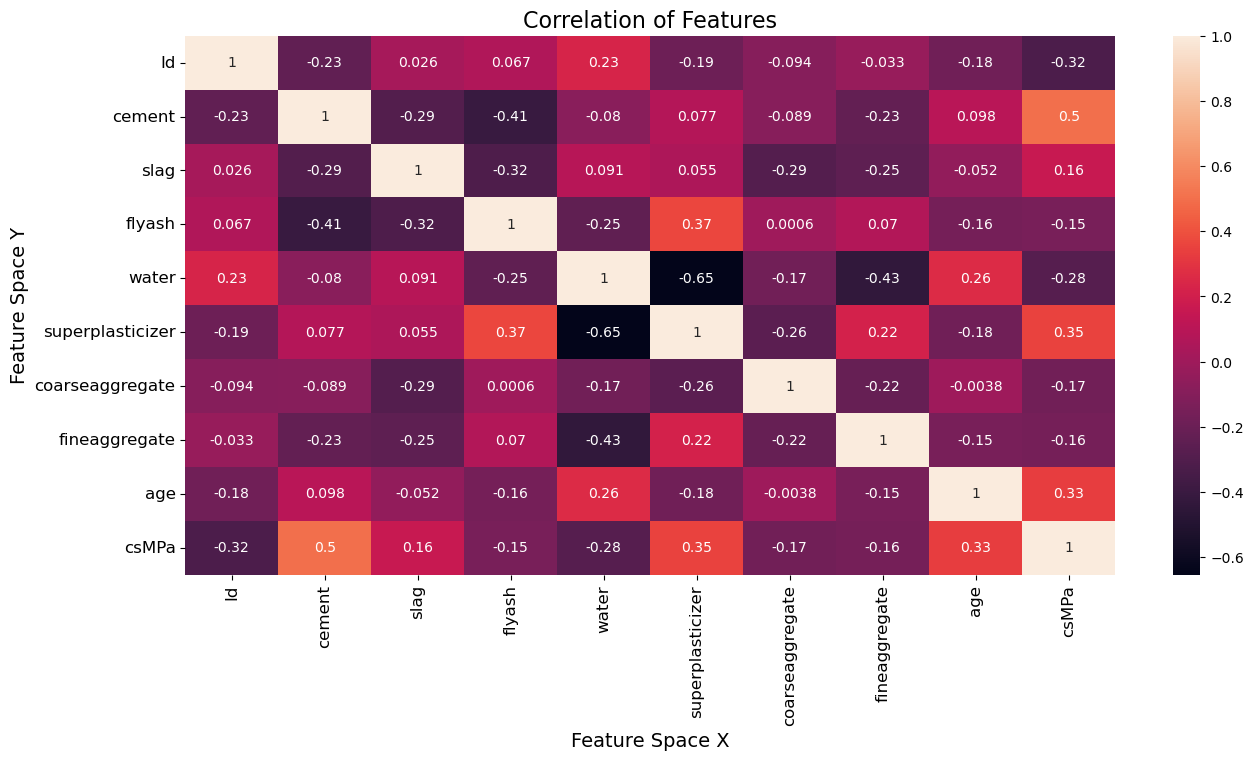

In [13]:
figure = plt.figure(figsize=[15, 7])
sns.heatmap(data=train_df.corr(), annot=True)
plt.xticks(size=12, rotation=90)
plt.yticks(size=12)
plt.xlabel(xlabel='Feature Space X', size=14)
plt.ylabel(ylabel='Feature Space Y', size=14)
plt.title(label='Correlation of Features', size=16)
plt.show()

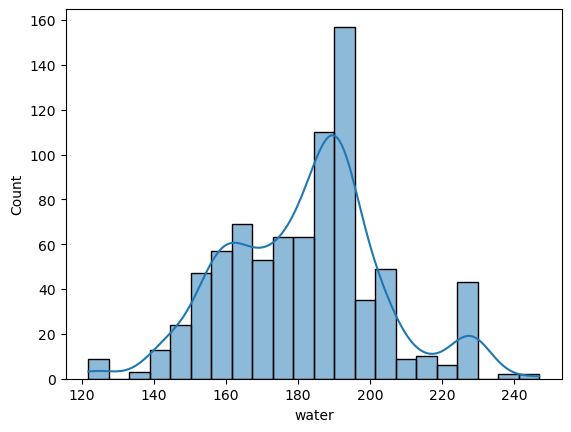

In [14]:
sns.histplot(data = train_df, x = 'water', kde = True)
plt.show()

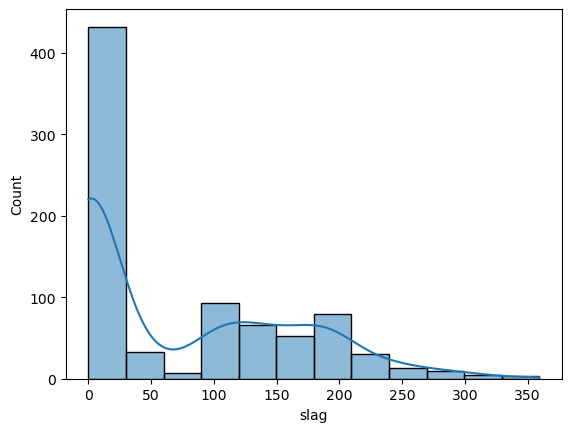

In [15]:
sns.histplot(data = train_df, x = 'slag', kde = True)
plt.show()

water


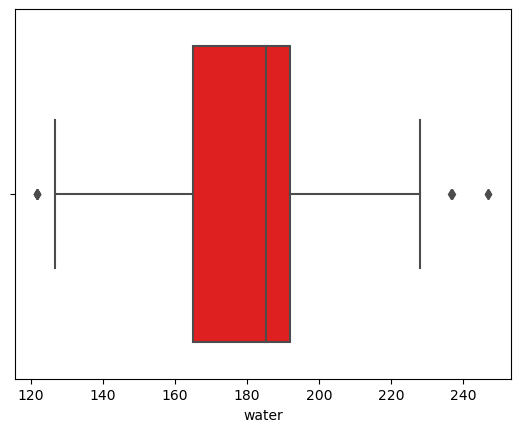

superplasticizer


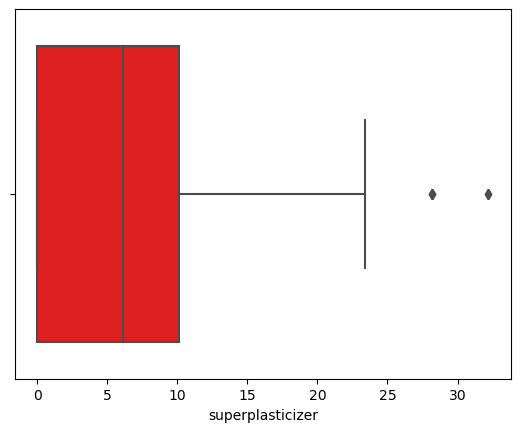

coarseaggregate


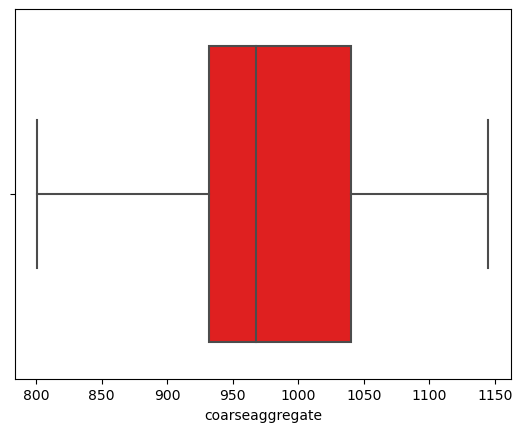

fineaggregate


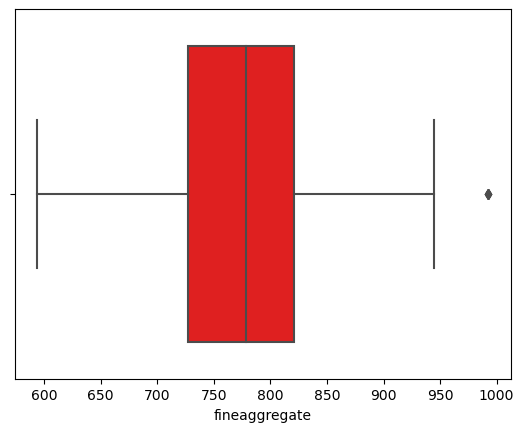

age


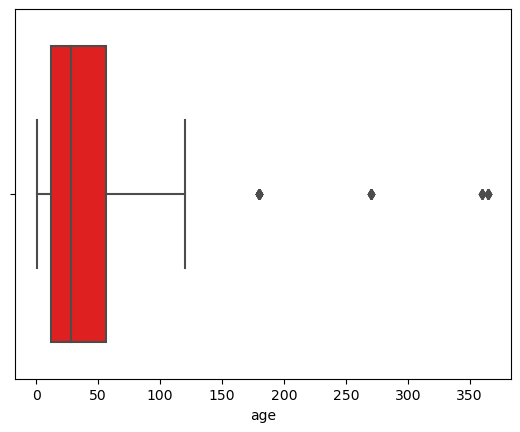

csMPa


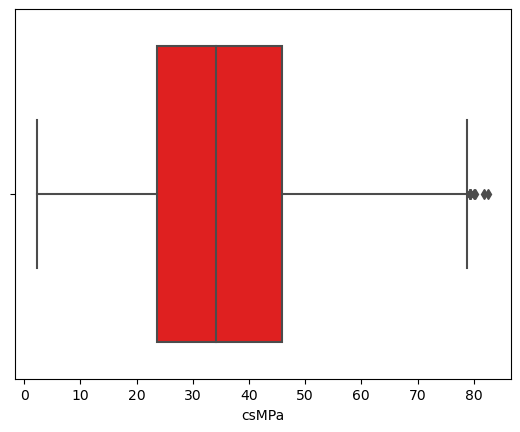

In [16]:
for col in train_df.iloc[:,4:].columns:
    print(col)
    sns.boxplot(x = train_df[col], data = train_df, color = 'red')
    plt.show()

In [17]:
def Outlier(var):
    for x in var.iloc[:, 4:].columns:
        Q1 = var[x].quantile(0.25)
        Q3 = var[x].quantile(0.75)
        IQR = Q3-Q1
        Lower = Q1-(1.5*IQR)
        Upper = Q3+(1.5*IQR)
        var.loc[:,x] = np.where(var[x].values > Upper, Upper, var[x].values)
        var.loc[:,x] = np.where(var[x].values < Lower, Lower, var[x].values)
    return var
df_train = Outlier(train_df)

water


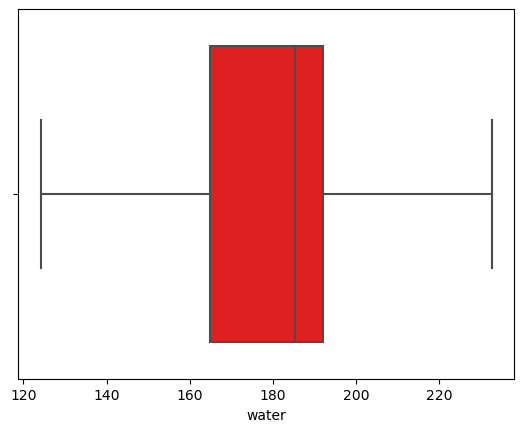

superplasticizer


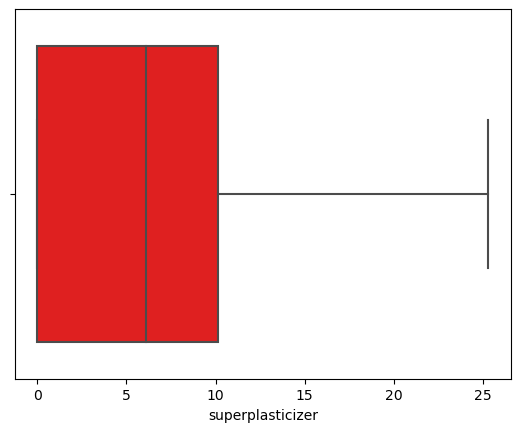

coarseaggregate


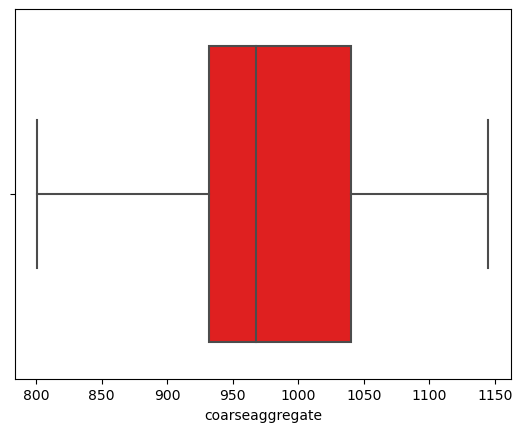

fineaggregate


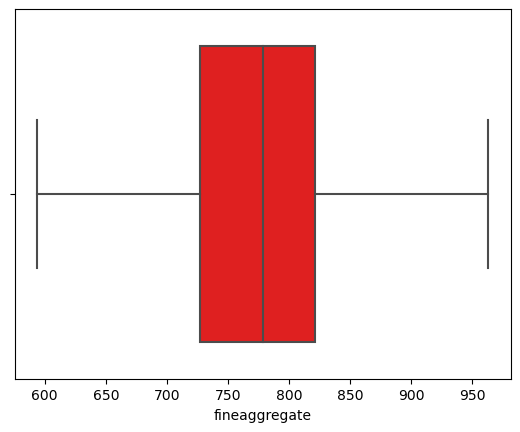

age


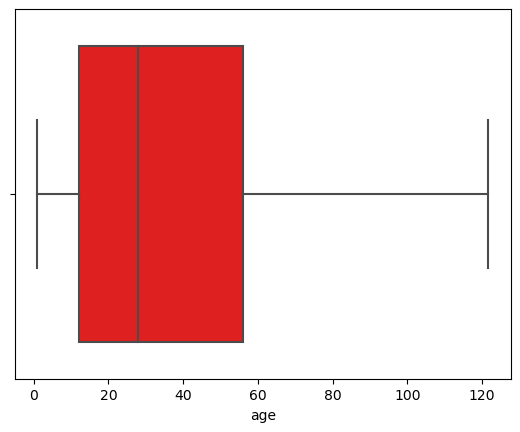

csMPa


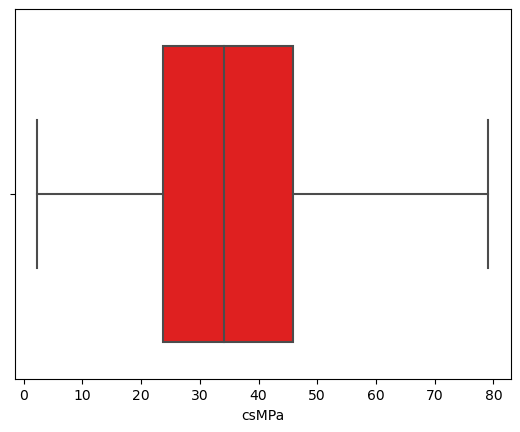

In [18]:
for col in train_df.iloc[:,4:].columns:
    print(col)
    sns.boxplot(x = train_df[col], data = train_df, color = 'red')
    plt.show()

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                824 non-null    int64  
 1   cement            824 non-null    float64
 2   slag              824 non-null    float64
 3   flyash            824 non-null    float64
 4   water             824 non-null    float64
 5   superplasticizer  824 non-null    float64
 6   coarseaggregate   824 non-null    float64
 7   fineaggregate     824 non-null    float64
 8   age               824 non-null    float64
 9   csMPa             824 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 64.5 KB


In [20]:
df_train.skew()

Id                  0.000627
cement              0.493343
slag                0.802065
flyash              0.566038
water               0.068299
superplasticizer    0.682616
coarseaggregate    -0.041485
fineaggregate      -0.272946
age                 1.190324
csMPa               0.452666
dtype: float64

# Train-Test Split:

In [21]:
X = df_train.iloc[:, 1:9]
Y = df_train['csMPa']

In [22]:
X

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
0,158.6,148.9,116.0,175.1,15.0,953.3,719.7,28.0
1,424.0,22.0,132.0,178.0,8.5,822.0,750.0,28.0
2,275.1,0.0,121.4,159.5,9.9,1053.6,777.5,3.0
3,252.0,97.0,76.0,194.0,8.0,835.0,821.0,28.0
4,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,3.0
...,...,...,...,...,...,...,...,...
819,286.3,200.9,0.0,144.7,11.2,1004.6,803.7,3.0
820,246.8,0.0,125.1,143.3,12.0,1086.8,800.9,14.0
821,190.3,0.0,125.2,166.6,9.9,1079.0,798.9,100.0
822,475.0,118.8,0.0,181.1,8.9,852.1,781.5,28.0


In [23]:
Y

0      27.68
1      62.05
2      23.80
3      33.40
4       7.40
       ...  
819    24.40
820    42.22
821    33.56
822    68.30
823    38.46
Name: csMPa, Length: 824, dtype: float64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size = 0.20, random_state = 42)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(659, 8)
(165, 8)
(659,)
(165,)


# Standard Scaler:

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

In [29]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 1.Linear Regression:

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
model = LinearRegression()

In [32]:
model.fit(X_train, Y_train)

LinearRegression()

In [33]:
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

<AxesSubplot:xlabel='csMPa'>

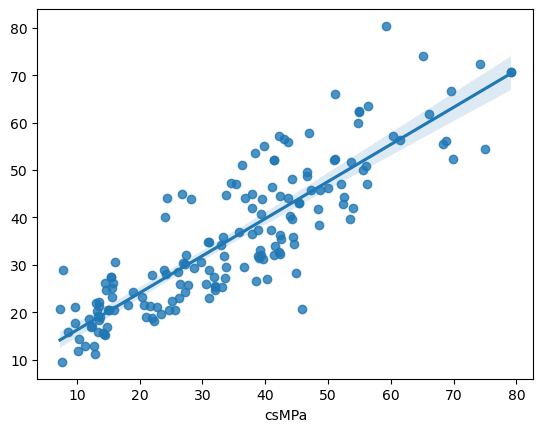

In [34]:
sns.regplot(Y_test, Y_pred_test)

# 2. RandomForest Regressor:

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
rfr = RandomForestRegressor(ccp_alpha=0.0)

In [37]:
rfr.fit(X_train, Y_train)

RandomForestRegressor()

In [38]:
Y_pred_rfr_train = rfr.predict(X_train)
Y_pred_rfr_test = rfr.predict(X_test)

<AxesSubplot:xlabel='csMPa'>

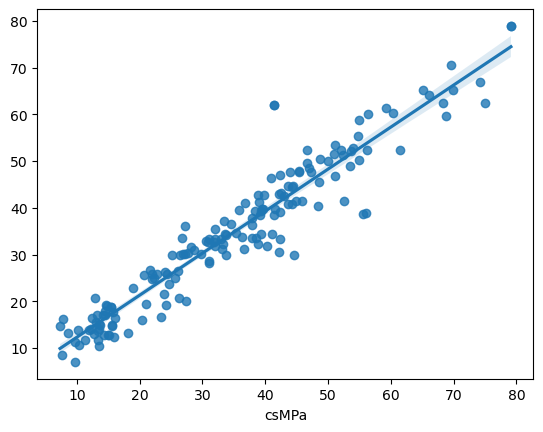

In [39]:
sns.regplot(Y_test, Y_pred_rfr_test)

# 3.KNeighbors Regressor:

In [40]:
from sklearn.neighbors import KNeighborsRegressor

In [41]:
neigh = KNeighborsRegressor(n_neighbors = 3)

In [42]:
neigh.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=3)

In [43]:
Y_pred_neigh_train = neigh.predict(X_train)
Y_pred_neigh_test = neigh.predict(X_test)

<AxesSubplot:xlabel='csMPa'>

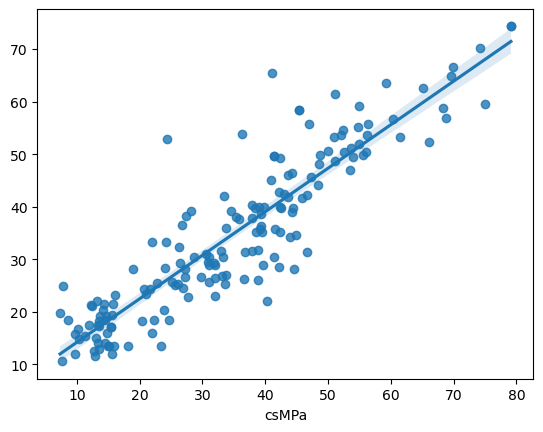

In [44]:
sns.regplot(Y_test, Y_pred_neigh_test)

**Importing metrics to check RMSE and R2_score:**

In [45]:
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
RMSE_lr = np.sqrt(mean_squared_error(Y_test, Y_pred_test))
RMSE_rfr = np.sqrt(mean_squared_error(Y_test, Y_pred_rfr_test))
RMSE_Knn = np.sqrt(mean_squared_error(Y_test, Y_pred_neigh_test))

In [47]:
r2_lr = r2_score(Y_test, Y_pred_test)
r2_rfr = r2_score(Y_test, Y_pred_rfr_test)
r2_Knn = r2_score(Y_test, Y_pred_neigh_test)

In [48]:
pd.Series(data = [RMSE_lr, RMSE_rfr, RMSE_Knn], index = 'lr rfr Knn'.split())

lr     8.466662
rfr    5.023688
Knn    7.108229
dtype: float64

In [49]:
pd.Series(data = [r2_lr, r2_rfr, r2_Knn], index = 'lr rfr Knn'. split())

lr     0.744631
rfr    0.910094
Knn    0.820003
dtype: float64

In [50]:
x_predict = list(rfr.predict(X_test))
predicted_df = {'predicted_values': x_predict, 'original_values': Y_test}
#creating new dataframe
pd.DataFrame(predicted_df).head(20)

,predicted_values,original_values
610,16.172200,7.75000
174,60.181475,56.40000
67,31.868100,32.04000
168,15.663900,13.09000
275,42.576760,43.01000
335,50.337667,54.90000
810,17.801600,15.82000
86,31.265500,36.56000
672,38.694207,55.60000
715,11.236400,9.74000


In [83]:
test_df.head()

,Id,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
0,31,266.0,114.0,0.0,228.0,0.0,932.0,670.0,365
1,109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7
2,136,389.9,189.0,0.0,145.9,22.0,944.7,755.8,28
3,88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3
4,918,145.0,0.0,179.0,202.0,8.0,824.0,869.0,28


In [84]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                206 non-null    int64  
 1   cement            206 non-null    float64
 2   slag              206 non-null    float64
 3   flyash            206 non-null    float64
 4   water             206 non-null    float64
 5   superplasticizer  206 non-null    float64
 6   coarseaggregate   206 non-null    float64
 7   fineaggregate     206 non-null    float64
 8   age               206 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 14.6 KB


superplasticizer


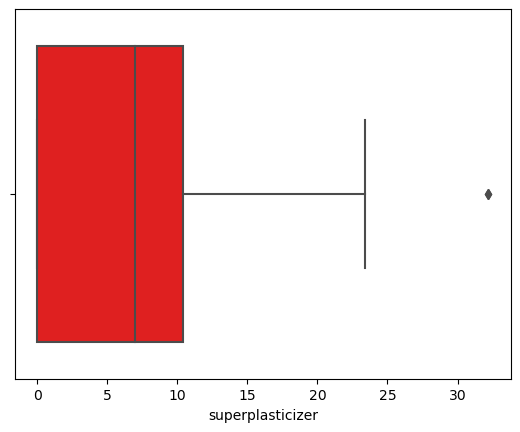

coarseaggregate


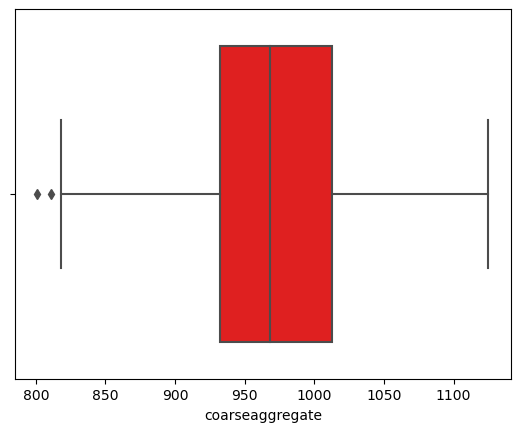

fineaggregate


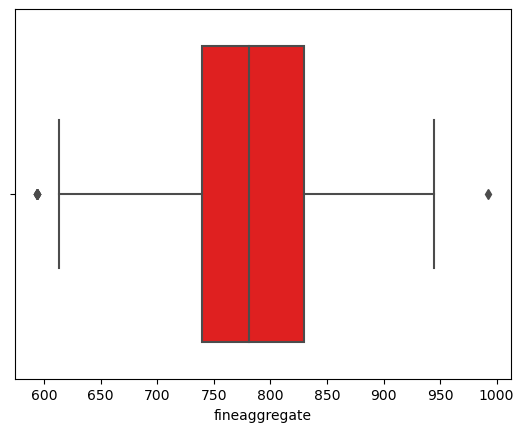

age


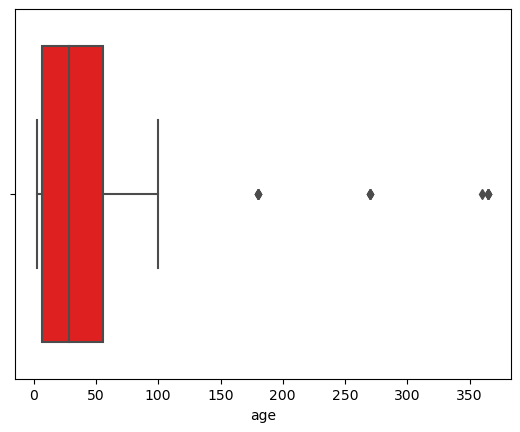

In [86]:
for col in test_df.iloc[:,5:].columns:
    print(col)
    sns.boxplot(x = test_df[col], data = test_df, color = 'red')
    plt.show()

In [87]:
def Outlier(var):
    for x in var.iloc[:, 5:].columns:
        Q1 = var[x].quantile(0.25)
        Q3 = var[x].quantile(0.75)
        IQR = Q3-Q1
        Lower = Q1-(1.5*IQR)
        Upper = Q3+(1.5*IQR)
        var.loc[:,x] = np.where(var[x].values > Upper, Upper, var[x].values)
        var.loc[:,x] = np.where(var[x].values < Lower, Lower, var[x].values)
    return var
df_test = Outlier(test_df)

superplasticizer


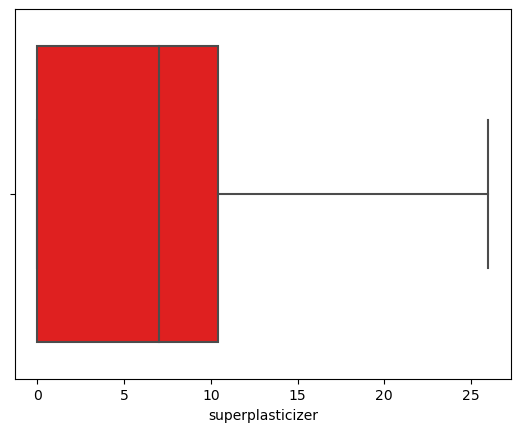

coarseaggregate


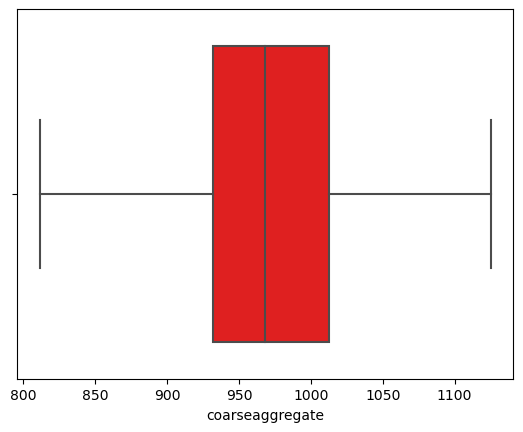

fineaggregate


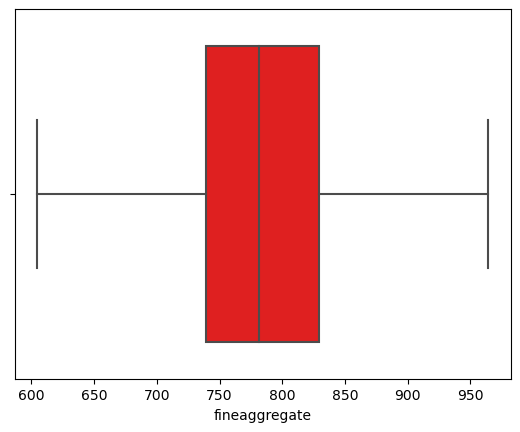

age


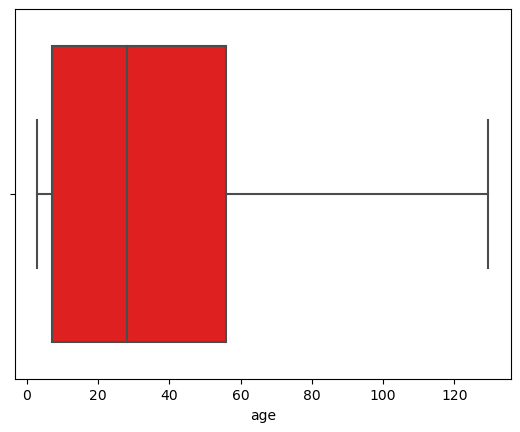

In [88]:
for col in test_df.iloc[:,5:].columns:
    print(col)
    sns.boxplot(x = test_df[col], data = test_df, color = 'red')
    plt.show()

In [90]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                206 non-null    int64  
 1   cement            206 non-null    float64
 2   slag              206 non-null    float64
 3   flyash            206 non-null    float64
 4   water             206 non-null    float64
 5   superplasticizer  206 non-null    float64
 6   coarseaggregate   206 non-null    float64
 7   fineaggregate     206 non-null    float64
 8   age               206 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 14.6 KB


In [91]:
test_concrete = df_test.iloc[:, 1:]

In [93]:
predicted_test = rfr.predict(test_concrete)

In [94]:
predicted_test

array([58.2779725, 61.3085675, 61.3085675, 61.3085675, 53.6048725,
       61.5942475, 61.5942475, 53.6048725, 53.6048725, 52.007835 ,
       53.3047925, 58.2779725, 61.3085675, 61.3085675, 61.5942475,
       58.2779725, 53.6048725, 58.2779725, 61.5942475, 61.5942475,
       58.2779725, 52.349935 , 53.6048725, 58.2779725, 61.5942475,
       53.6048725, 52.007835 , 61.3085675, 53.6048725, 52.007835 ,
       52.007835 , 52.007835 , 58.2779725, 53.6048725, 61.5942475,
       58.2779725, 53.6048725, 61.5942475, 58.2779725, 53.6048725,
       52.007835 , 58.2779725, 58.2779725, 61.5942475, 53.6048725,
       61.3085675, 53.6048725, 52.007835 , 52.007835 , 58.2779725,
       61.3085675, 58.2779725, 61.5942475, 58.2779725, 52.349935 ,
       61.3085675, 53.6048725, 52.007835 , 53.6048725, 52.007835 ,
       61.5942475, 52.007835 , 53.6048725, 61.3085675, 58.2779725,
       53.6048725, 61.5942475, 53.6048725, 53.6048725, 53.6048725,
       52.007835 , 58.2779725, 52.007835 , 53.3047925, 61.5942

In [96]:
test_concrete['csMPa'] = predicted_test

In [97]:
test_concrete.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,266.0,114.0,0.0,228.0,0.0,932.0,670.0,129.5,58.277972
1,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7.0,61.308567
2,389.9,189.0,0.0,145.9,22.0,944.7,755.8,28.0,61.308567
3,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3.0,61.308567
4,145.0,0.0,179.0,202.0,8.0,824.0,869.0,28.0,53.604873


In [98]:
test_concrete.to_csv('Submission_concrete.csv', index = False , header = False)